# Titanic Dataset Analysis
This notebook explores the Titanic dataset, aiming to predict passenger survival and gain insights through data mining techniques.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

%matplotlib inline

## Data Loading and Initial Exploration

In [2]:
# Load training data
train_df = pd.read_csv('Data/Raw/train.csv')

# Load test data
test_df = pd.read_csv('Data/Raw/test.csv')

# Load gender submission data
gender_submission_df = pd.read_csv('Data/Raw/gender_submission.csv')

### Initial Exploration

#### Train Data

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Test Data

In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [8]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


#### Gender Submission Data

In [9]:
gender_submission_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [10]:
gender_submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [11]:
gender_submission_df.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


### Missing Data

#### Train Data

In [12]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Test Data

In [13]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Data Cleaning and Preprocessing

In [14]:
class DataPreprocessor:
    @staticmethod
    def handle_missing_values(df):
        df.Age.fillna(df.Age.median(), inplace = True)
        df.Fare.fillna(df.Fare.median(), inplace = True)
        df.Embarked.fillna(df.Embarked.mode()[0], inplace = True)
        return df

    @staticmethod
    def encode_categorical_variables(df):
        df = pd.get_dummies(df, columns = ['Sex', 'Embarked'], drop_first = True)
        return df
    
    # Dropping the column Name which is useful in neither the EDA nor the Machine Learning.
    @staticmethod
    def drop_features(df):
        df = df.drop(['Name', 'Ticket', 'Cabin'], axis = 1)
        return df

# Clean and preprocess training data
train_df = DataPreprocessor.handle_missing_values(train_df)
train_df = DataPreprocessor.encode_categorical_variables(train_df)
train_df = DataPreprocessor.drop_features(train_df)

# Clean and preprocess test data
test_df = DataPreprocessor.handle_missing_values(test_df)
test_df = DataPreprocessor.encode_categorical_variables(test_df)
test_df = DataPreprocessor.drop_features(test_df)

C:\Users\Ratch\AppData\Local\Temp\ipykernel_566104\728751376.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(df.Age.median(), inplace = True)
C:\Users\Ratch\AppData\Local\Temp\ipykernel_566104\728751376.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

## Exploratory Data Analysis (EDA)

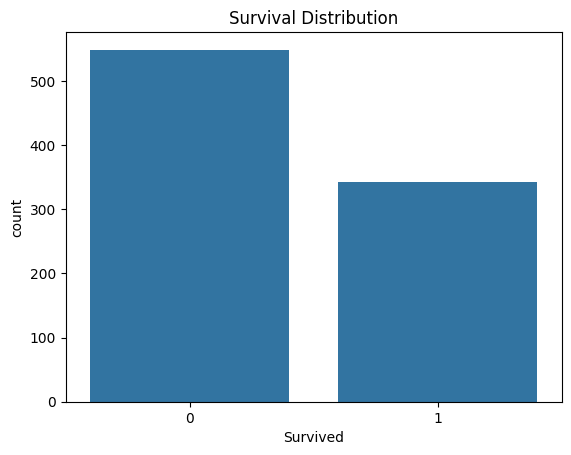

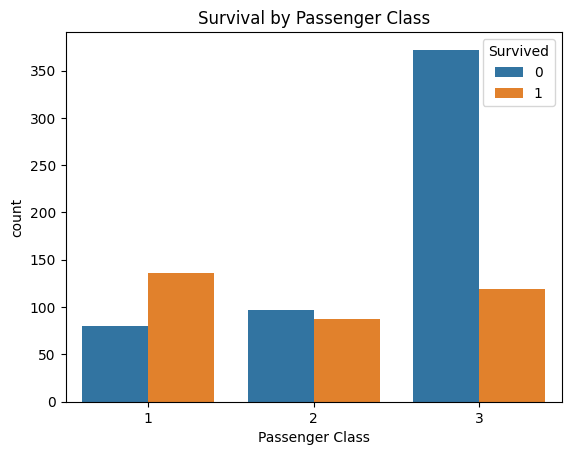

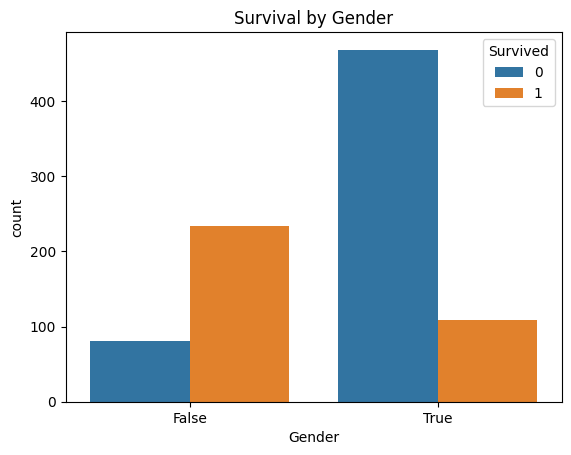

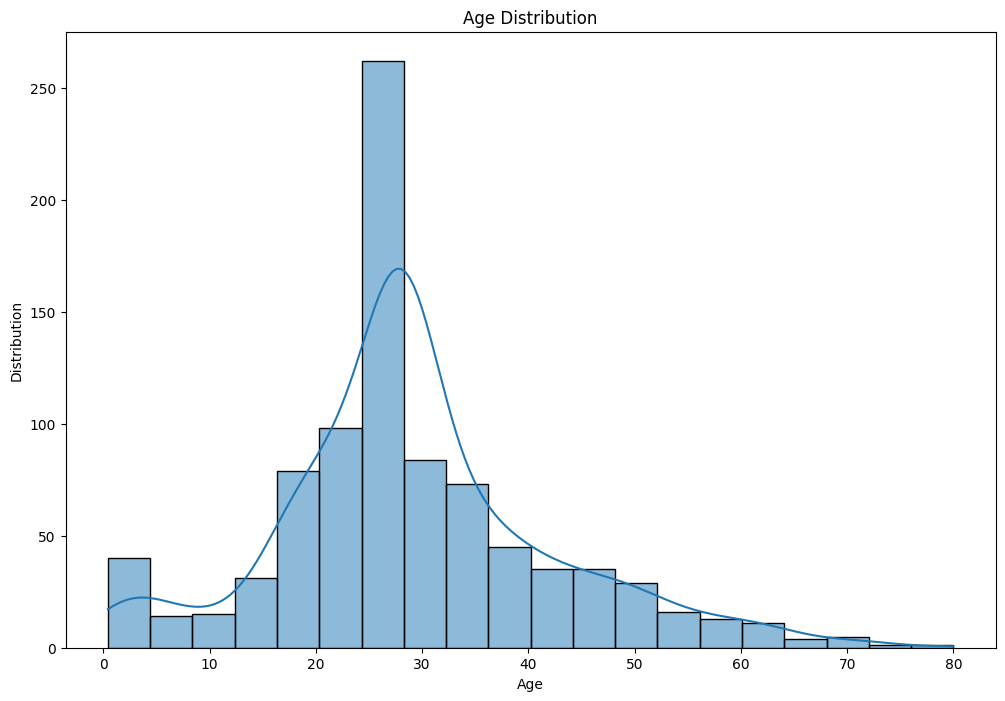

In [15]:
class EDA:
    @staticmethod
    def plot_survival_distribution(df):
        sns.countplot(x = 'Survived', data = df)
        plt.title('Survival Distribution')
        plt.show()

    @staticmethod
    def plot_survival_by_class(df):
        sns.countplot(x = 'Pclass', hue = 'Survived', data = df)
        plt.title('Survival by Passenger Class')
        plt.xlabel('Passenger Class')
        plt.show()

    @staticmethod
    def plot_survival_by_gender(df):
        sns.countplot(x = 'Sex_male', hue = 'Survived', data = df)
        plt.title('Survival by Gender')
        plt.xlabel('Gender')
        plt.show()

    @staticmethod
    def plot_age_distribution(df):
        plt.figure(figsize = (12, 8))
        sns.histplot(df.Age, bins = 20, kde = True)
        plt.title('Age Distribution')
        plt.xlabel('Age')
        plt.ylabel('Distribution')
        plt.show()

EDA.plot_survival_distribution(train_df)
EDA.plot_survival_by_class(train_df)
EDA.plot_survival_by_gender(train_df)
EDA.plot_age_distribution(train_df)

## Feature Engineering

In [16]:
class FeatureEngineering:
    @staticmethod
    def create_family_size_feature(df):
        df['FamilySize'] = df.SibSp + df.Parch + 1
        return df

# Feature engineering on training data
train_df = FeatureEngineering.create_family_size_feature(train_df)

# Feature engineering on test data
test_df = FeatureEngineering.create_family_size_feature(test_df)

## Model Building and Evaluation

In [17]:
class TitanicSurvivalModel:
    def __init__(self, model):
        self.model = model

    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        return self.model.predict(X_test)

    def evaluate(self, y_test, y_pred):
        self.accuracy = accuracy_score(y_test, y_pred)

        self.confusion = None
        try:
            self.confusion = confusion_matrix(y_test, y_pred)
        except TypeError:
            # Not suited for Decision Tree.
            pass

        self.classification_rep = classification_report(y_test, y_pred)

        return self.accuracy, self.confusion, self.classification_rep
    
    def plot_confusion_matrix(self):
        """
        This function generates an interactive confusion matrix plot using plotly.
        """
        z = self.confusion[ : : -1]  # Reverse to match the order of the plotly plot
        x = ['Survived', 'Non-Survived']
        y = ['Non-Survived', 'Survived']
        
        # Create the plotly figure
        fig = ff.create_annotated_heatmap(z, x = x, y = y, colorscale = 'Blues')
        
        # Update layout for better visibility
        fig.update_layout(
            title = 'Confusion Matrix',
            xaxis = dict(title = 'Predicted label'),
            yaxis = dict(title = 'True label'),
            annotations = dict(
                showarrow = True,
                font_size = 12,
                font_color = 'white'
            )
        )
        
        # Display the plot
        fig.show()

# Prepare data for modeling
X_train = train_df.drop(['Survived'], axis = 1)
y_train = train_df.Survived
X_test = test_df

# Initialize models
models = {
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier()
}

# Train and evaluate models
for name, model in models.items():
    print(f'Training { name }...')
    titanic_model = TitanicSurvivalModel(model)
    titanic_model.train(X_train, y_train)

    y_pred = titanic_model.predict(X_train)
    titanic_model.evaluate(y_train, y_pred)

    print(f'\n{ name } Accuracy: { titanic_model.accuracy * 100:.4f} %')
    print('Confusion Matrix:\n')
    titanic_model.plot_confusion_matrix()
    print(f'Classification Report:\n{ titanic_model.classification_rep }')
    print('\n')

# Predict survival on test data
final_model = models['Random Forest']
final_model.fit(X_train, y_train)
predictions = final_model.predict(X_test)

Training Logistic Regression...

Logistic Regression Accuracy: 78.6756 %
Confusion Matrix:



e:\Softwares\Programming Languages\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       549
           1       0.74      0.68      0.71       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.77       891
weighted avg       0.78      0.79      0.78       891



Training Decision Tree...

Decision Tree Accuracy: 100.0000 %
Confusion Matrix:



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       549
           1       1.00      1.00      1.00       342

    accuracy                           1.00       891
   macro avg       1.00      1.00      1.00       891
weighted avg       1.00      1.00      1.00       891



Training Random Forest...

Random Forest Accuracy: 100.0000 %
Confusion Matrix:



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       549
           1       1.00      1.00      1.00       342

    accuracy                           1.00       891
   macro avg       1.00      1.00      1.00       891
weighted avg       1.00      1.00      1.00       891





## Conclusion and Insights
Through this analysis, several insights were gathered:
- The survival rate among passengers varied significantly by passenger class and gender.
- Passengers in higher classes (1st class) had a higher chance of survival compared to lower classes.
- Women had a higher survival rate than men.
- Age distribution showed a large number of younger passengers.
- Family size seemed to have an impact on survival rates, with smaller families having a higher survival rate.

Further analysis and model tuning could be done to improve predictive accuracy and explore additional factors influencing survival.